In [4]:
import pandas as pd
import numpy as np

csv_file = 'csv/lenskart_products_categorical.csv'

df = pd.read_csv(csv_file,
                 usecols=['product_id',
                          'encodings'],
                 dtype={"product_id": np.int32,
                        "encodings": "object"})

In [5]:
#print(df["encodings"][0])
print(type(df["encodings"][0]))
#print(np.array(df["encodings"][0]).shape)
encoding_str = df["encodings"][0]
encoding_arr = np.fromstring(encoding_str[1:-1], dtype=np.float32, sep=' ')
print(encoding_arr.shape)
print(encoding_arr)

<class 'str'>
(128,)
[  0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.      876.25214   0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.      878.2718    0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.      443.56094   0.      634.3481    0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
 697.12573   0.      249.48418 693.9183    0.        0.        0.
   0.        0.        0.      627.27673   0.      827.3932    0.
   0.        0.      950.40717   0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.      538.501     0.      533.0867    0.        0.
   0.        0.        0.        0.        0.        0.

In [6]:
encoding_dataset = []
# encoding_dataset.append(encoding_arr)
for ind in df.index:
    encoding_str = df["encodings"][ind]
    if(type(df["encodings"][ind]) is not str):
        encoding_dataset.append(np.ones(128)*9999999)
        print(ind," is not string")
        continue
    encoding_arr = np.fromstring(encoding_str[1:-1], dtype=np.float32, sep=' ')
    #encoding = np.fromstring((df["encodings"][ind])[1:-1], dtype=np.float32, sep=' ')
    encoding_dataset.append(encoding_arr)
print(len(encoding_dataset))
print(np.array(encoding_dataset).shape)
print(len(df))

2631  is not string
2794  is not string
3565  is not string
3861  is not string
3863  is not string
3873  is not string
3877  is not string
3878  is not string
3879  is not string
3883  is not string
5570
(5570, 128)
5570


In [7]:
from sklearn.neighbors import NearestNeighbors
num_neighbours = 10
nbrs = NearestNeighbors(n_neighbors=num_neighbours,
                        algorithm='ball_tree',
                        metric='euclidean').\
    fit(encoding_dataset)

In [8]:
distances, indices = nbrs.kneighbors(encoding_dataset[0:2])
print(indices)
print(distances)
print(indices.shape)
print(distances.shape)

[[   0 3600 4025  818 2596 1745 3854 4248  742  374]
 [   1 1686 1683  370  218 1520 1688 3166  748 2507]]
[[   0.         1323.452089   1342.63101278 1382.34445504 1400.88429344
  1413.05856793 1420.38671617 1425.32273251 1431.67467479 1440.41622337]
 [   0.           49.19765184   66.64472573   80.79298559   81.77317813
    84.02815487   86.84151315   87.36224047   89.30582047   94.93069529]]
(2, 10)
(2, 10)


In [9]:
from tensorflow import keras
loaded = keras.models.load_model("saved_models_autoencoder/basic_attempt1_deep")

In [10]:
import urllib.request
import io
from PIL import Image
import cv2

URL = "http://d3b4di70nev5h5.cloudfront.net/media/catalog/product//D/S/DSC_0010_4.JPG"
with urllib.request.urlopen(URL) as url:
    f = io.BytesIO(url.read())

img = Image.open(f).convert("RGB")

img_orig = np.array(img)
print(type(img_orig))
print(img_orig.shape)
img_res = cv2.resize(img_orig,(256,256))

img_model = np.reshape(img_res,[1,256,256,3])
img_model = np.asarray(img_model,dtype='float32')
img_model/=255.0
print(img_model.min(),img_model.max(),img_model.mean())
print(img_model.shape)

encoded_img = loaded.encoder(img_model).numpy()
print(encoded_img.shape)
flattened_encoding = np.ravel(encoded_img).reshape((1,-1))
print(flattened_encoding.shape)

distances, indices = nbrs.kneighbors(flattened_encoding)
print(indices)

<class 'numpy.ndarray'>
(480, 800, 3)
0.0 1.0 0.95000964
(1, 256, 256, 3)
(1, 8, 8, 2)
(1, 128)
[[2202 2201 2200 3856 3019 3857 1089 3744 3711 3795]]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
#from keras.preprocessing import image
import matplotlib.image as mpimg

2202    12552
2201    12551
2200    12550
3856    50581
3019    36125
3857    50582
1089    21597
3744    49953
3711    49818
3795    50030
Name: product_id, dtype: int32
(10,)
2202
provided_dataset_train/train/12552.jpg
provided_dataset_train/train/12552.jpg provided_dataset_validate/validate/12552.jpg
2201
provided_dataset_train/train/12551.jpg
provided_dataset_train/train/12551.jpg provided_dataset_validate/validate/12551.jpg
2200
provided_dataset_train/train/12550.jpg
provided_dataset_train/train/12550.jpg provided_dataset_validate/validate/12550.jpg
3856
provided_dataset_train/train/50581.jpg
provided_dataset_train/train/50581.jpg provided_dataset_validate/validate/50581.jpg
3019
provided_dataset_train/train/36125.jpg
provided_dataset_train/train/36125.jpg provided_dataset_validate/validate/36125.jpg
3857
provided_dataset_train/train/50582.jpg
provided_dataset_train/train/50582.jpg provided_dataset_validate/validate/50582.jpg
1089
provided_dataset_train/train/21597.jpg
provided_da

<Figure size 576x576 with 0 Axes>

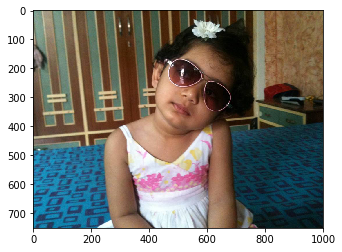

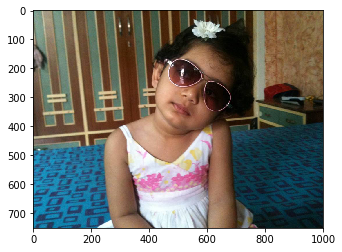

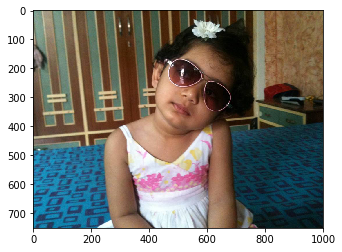

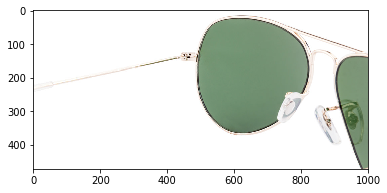

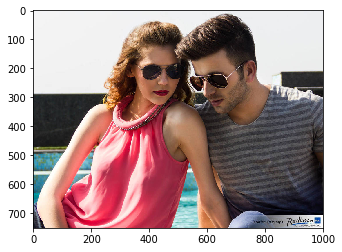

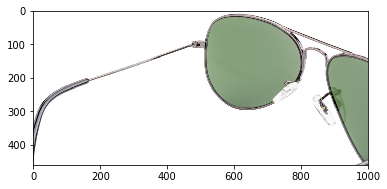

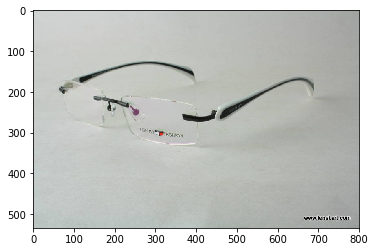

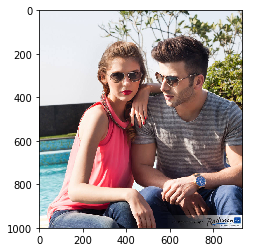

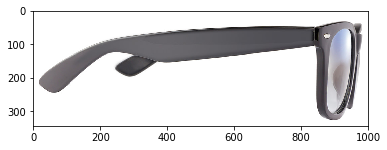

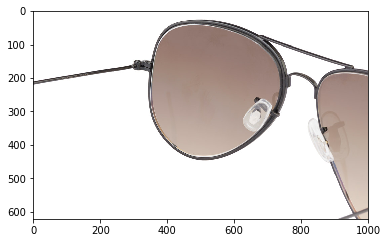

In [12]:
product_id = df["product_id"][indices[0]]
print(product_id)
print(product_id.shape)


import numpy as np
import matplotlib.pyplot as plt
#from keras.preprocessing import image
import matplotlib.image as mpimg

w=5
h=2
fig=plt.figure(figsize=(8, 8))
#fig=plt.figure()
columns = 1
rows = 10
for index, (i,value) in enumerate(product_id.items()):
    print(i)
    #print(product_id.get_loc(i))
    #print(str(product_id))
    print('provided_dataset_train/train/'+ str(value) + ".jpg")
    file_name1 = 'provided_dataset_train/train/'+ str(value) + ".jpg"
    file_name2 = 'provided_dataset_validate/validate/'+ str(value) + ".jpg"
    print(file_name1,file_name2)
    try:
        image = mpimg.imread(file_name1)
        plt.figure()
        plt.imshow(image)
    # <something gets done here>

    except:
        try:
            image = mpimg.imread(file_name2)
            plt.figure()
            plt.imshow(image)
            #img = image.load_img(file_name2)
        except:
            print("Image not found")
#plt.imshow(image)